In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense,Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model

Using TensorFlow backend.
D:\Aplikasi\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Aplikasi\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Aplikasi\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Aplikasi\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarn

In [3]:
df = pd.read_csv("MSFT.csv",na_values=["null"],index_col="Date",parse_dates=True,infer_datetime_format=True)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,0.605903,0.616319,0.598090,0.616319,0.447268,53033600
1990-01-03,0.621528,0.626736,0.614583,0.619792,0.449788,113772800
1990-01-04,0.619792,0.638889,0.616319,0.638021,0.463017,125740800
1990-01-05,0.635417,0.638889,0.621528,0.622396,0.451678,69564800
1990-01-08,0.621528,0.631944,0.614583,0.631944,0.458607,58982400


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,7334.000000,7334.000000,7334.000000,7334.000000,7334.000000,7.334000e+03
mean,28.578362,28.891892,28.261203,28.582426,24.008891,6.022760e+07
std,22.279033,22.476021,22.054379,22.275692,21.941225,3.400345e+07
min,0.591146,0.604167,0.583333,0.598090,0.434039,3.705600e+06
25%,12.457031,12.595703,12.261719,12.488281,9.062849,3.821840e+07
50%,26.980000,27.235000,26.730000,26.990000,20.431164,5.429885e+07
75%,34.716562,35.099998,34.250000,34.687500,26.993589,7.367888e+07
max,115.419998,116.180000,114.930000,115.610001,115.112709,7.645040e+08


In [7]:
df.shape

(7334, 6)

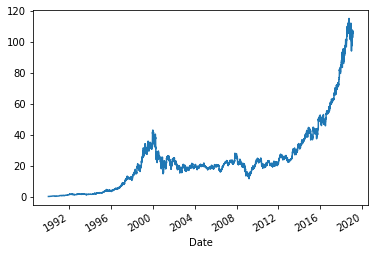

In [8]:
df["Adj Close"].plot()

In [9]:
X=df.drop(["Adj Close"],axis=1)
X=X.drop(["Close"],axis=1)

In [10]:
X.head()

,Open,High,Low,Volume
Date,,,,
1990-01-02,0.605903,0.616319,0.598090,53033600
1990-01-03,0.621528,0.626736,0.614583,113772800
1990-01-04,0.619792,0.638889,0.616319,125740800
1990-01-05,0.635417,0.638889,0.621528,69564800
1990-01-08,0.621528,0.631944,0.614583,58982400


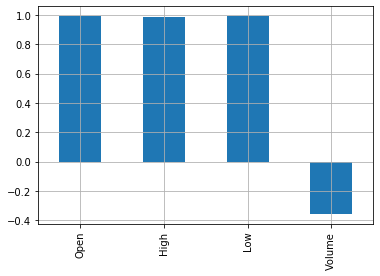

In [13]:
X.corrwith(df["Adj Close"]).plot.bar(grid=True)

In [15]:
test = df
target_adj_close= pd.DataFrame(df["Adj Close"])
feature_columns = ["Open","High","Low","Volume"]

In [32]:
scaler=MinMaxScaler()
feature_minmax_transform_data=scaler.fit_transform(test[feature_columns])
feature_minmax_transform = pd.DataFrame(columns=feature_columns, data=feature_minmax_transform_data,index=test.index)
feature_minmax_transform.head()

,Open,High,Low,Volume
Date,,,,
1990-01-02,0.000129,0.000105,0.000129,0.064837
1990-01-03,0.000265,0.000195,0.000273,0.144673
1990-01-04,0.000249,0.000300,0.000288,0.160404
1990-01-05,0.000386,0.000300,0.000334,0.086566
1990-01-08,0.000265,0.000240,0.000273,0.072656


In [34]:
target_adj_close = target_adj_close.shift(-1)
validation_y = target_adj_close[-90:-1] 
target_adj_close = target_adj_close[:-90]

validation_x = feature_minmax_transform[-90:-1]
feature_minmax_transform=feature_minmax_transform[:-90]

In [43]:
ts_split = TimeSeriesSplit(n_splits=10)
for train_index, test_index in ts_split.split(feature_minmax_transform):
    X_train, X_test = feature_minmax_transform[:len(train_index)], feature_minmax_transform[len(train_index):]
    Y_train, Y_test = target_adj_close[:len(train_index)].values.ravel(), target_adj_close[len(train_index):].values.ravel()

In [44]:
X_test.shape

(658, 4)

In [45]:
X_train.shape

(6586, 4)

In [46]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)
modelawal = dt.fit(X_train,Y_train)

In [63]:
Y_pred1=modelawal.predict(X_test)

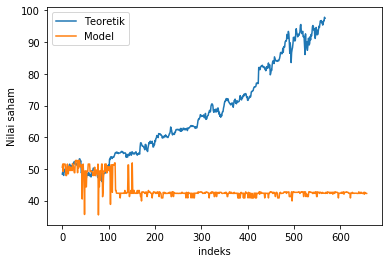

In [64]:
plt.plot(Y_test, label="Teoretik")
plt.plot(Y_pred1, label="Model")
plt.xlabel("indeks")
plt.ylabel("Nilai saham")
plt.legend()
plt.show()

In [50]:
X_train = np.array(X_train)
X_test = np.array(X_test)

X_tr_t = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_ts_t = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

In [55]:
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.models import Sequential

K.clear_session()
model=Sequential()
model.add(LSTM(16,input_shape=(1,X_train.shape[1]), activation = "relu", return_sequences=False))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")
early_stop=EarlyStopping(monitor="loss", patience=5, verbose=1)
history_model_lstm = model.fit(X_tr_t,Y_train,epochs=200,batch_size=8,verbose=1,shuffle=False,callbacks=[early_stop])


Epoch 1/200
6586/6586 [==============================] - 7s 1ms/step - loss: 203.1460
Epoch 2/200
6586/6586 [==============================] - 4s 617us/step - loss: 32.0452
Epoch 3/200
6586/6586 [==============================] - 4s 613us/step - loss: 29.3240
Epoch 4/200
6586/6586 [==============================] - 4s 656us/step - loss: 17.6148
Epoch 5/200
6586/6586 [==============================] - 4s 642us/step - loss: 7.2798
Epoch 6/200
6586/6586 [==============================] - 4s 636us/step - loss: 2.7260
Epoch 7/200
6586/6586 [==============================] - 4s 616us/step - loss: 1.5962
Epoch 8/200
6586/6586 [==============================] - 4s 643us/step - loss: 1.3601
Epoch 9/200
6586/6586 [==============================] - 4s 673us/step - loss: 1.2560
Epoch 10/200
6586/6586 [==============================] - 5s 707us/step - loss: 1.1905 0s - loss: 1.1
Epoch 11/200
6586/6586 [==============================] - 5s 717us/step - loss: 1.1489
Epoch 12/200
6586/6586 [=========

In [57]:
y_pred_test = model.predict(X_ts_t)

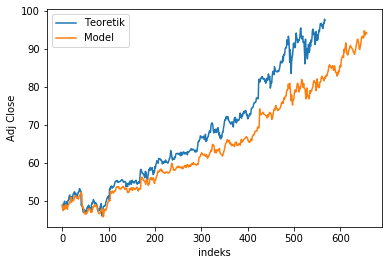

In [65]:
plt.plot(Y_test, label="Teoretik")
plt.plot(y_pred_test, label="Model")
plt.xlabel("indeks")
plt.ylabel("Adj Close")
plt.legend()
plt.show()